<a href="https://colab.research.google.com/github/dmp40/DataAnalitikCurse-23/blob/storks/%D0%9F%D0%BE%D0%BA%D1%80%D0%B5%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%94_%D0%A1_%22movies_eda_2_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Разведочный анализ по датасету IMDb Movies: 5000 фильмов с наибольшим рейтингом. Часть 2: Анализ количественных и категориальных признаков, а также взаимосвязи признаков**

![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

***Задача:***
провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

**В части 2 задания необходимо:**
1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.

****Задания со звездочкой факультативные (дополнительные)***

## 2. Загрузка датасета

Импортируйте модуль files для подгрузки датасета с ПК

In [8]:
from google.colab import files

Загрузите файл movies_clean.csv (сохранен по итогу выполнения предыдущего задания) с помощью files.upload()

In [9]:
#files.upload()

## 3. Подгрузка данных в питон и начало работы с ними

Импортируйте библиотеку pandas и присвойте ей короткое название pd

In [10]:
import pandas as pd

Откройте датасет movies_clean.csv и сохраните его в переменную dataset

In [11]:
dataset = pd.read_csv('/content/movies_clean')

Проведите обзор таблицы с помощью метода head()

In [12]:
dataset.head()

,Unnamed: 0,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
0,0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M,142,2834.0
1,1,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"('Kemal Sunal',), ('Münir Özkul',), ('Halit Ak...","40,492",NaN,87,NaN
2,2,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,X,175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"('Marlon Brando',), ('Al Pacino',), ('James Ca...","18,19,641",$134.97M,175,13497.0
3,3,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Lord of the Rings: The Return of the King,12A,201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"('Elijah Wood',), ('Viggo Mortensen',), ('Ian ...","18,01,662",$377.85M,201,37785.0
4,4,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Dark Knight,12A,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"('Christian Bale',), ('Heath Ledger',), ('Aaro...","25,98,173",$534.86M,152,53486.0


Удалите столбец 'Unnamed: 0' как ненужный с помощью метода drop(), передав в него параметры columns и inplace=True

In [13]:
dataset.drop(columns='Unnamed: 0', inplace=True)

## 4. Оценка размеров датасета, выбор признаков для анализа

Оцените размеры датасета с помощью атрибута shape

In [14]:
dataset.shape

(5000, 13)

Выведите информацию о датасете с помощью метода info()

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            5000 non-null   object 
 1   title             5000 non-null   object 
 2   certificate       5000 non-null   object 
 3   runtime           5000 non-null   object 
 4   genre             4970 non-null   object 
 5   rating            5000 non-null   float64
 6   about             4986 non-null   object 
 7   director          5000 non-null   object 
 8   stars             5000 non-null   object 
 9   votes             5000 non-null   object 
 10  gross_earn        4585 non-null   object 
 11  runtime_clear     5000 non-null   int64  
 12  gross_earn_clear  4585 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 507.9+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполните неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохраните Series ['gross_earn_clear'] в переменную gross_earn

In [16]:
gross_earn = dataset['gross_earn_clear']

Рассчитайте максимальное и минимальное значения доходов с фильмов с помощью методов max() и min() соответственно. Выведите значения на печать

In [17]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  93666.0 Наименьший доход:  0.0


Рассмотрите наблюдения, у которых значение по признаку gross_earn равно 0.0

In [18]:
dataset[dataset['gross_earn_clear']==0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
485,https://m.media-amazon.com/images/S/sash/4Fyxw...,Knockin' on Heaven's Door,87 min,"Action, Crime, Comedy",NaN,7.9,Two terminally ill patients escape from a hosp...,Thomas Jahn,"('Til Schweiger',), ('Jan Josef Liefers',), ('...","30,499",$0.00M,0,0.0
558,https://m.media-amazon.com/images/S/sash/4Fyxw...,Mr. Nobody,15,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,Jaco Van Dormael,"('Jared Leto',), ('Sarah Polley',), ('Diane Kr...","2,32,030",$0.00M,141,0.0
696,https://m.media-amazon.com/images/S/sash/4Fyxw...,Adam's Apples,R,94 min,"Comedy, Crime, Drama",7.7,A neo-Nazi sentenced to community service at a...,Anders Thomas Jensen,"('Ulrich Thomsen',), ('Mads Mikkelsen',), ('Ni...","50,694",$0.00M,94,0.0
1427,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ben X,15,93 min,"Drama, Thriller",7.3,As an alternative to getting bullied at school...,Nic Balthazar,"('Marijke Pinoy',), ('Greg Timmermans',), ('Ce...","18,943",$0.00M,93,0.0
1485,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pusher,18,110 min,"Crime, Thriller",7.3,A drug pusher grows increasingly desperate aft...,Nicolas Winding Refn,"('Kim Bodnia',), ('Zlatko Buric',), ('Laura Dr...","39,929",$0.00M,110,0.0
1622,https://m.media-amazon.com/images/S/sash/4Fyxw...,Nothing But the Truth,15,108 min,"Crime, Drama",7.2,"In Washington, D.C., a reporter faces a possib...",Rod Lurie,"('Kate Beckinsale',), ('Matt Dillon',), ('Vera...","38,253",$0.00M,108,0.0
1949,https://m.media-amazon.com/images/S/sash/4Fyxw...,Perfect Sense,15,92 min,"Drama, Romance, Sci-Fi",7.0,A chef and a scientist fall in love as an epid...,David Mackenzie,"('Ewan McGregor',), ('Eva Green',), ('Lauren T...","60,249",$0.00M,92,0.0
2493,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",$0.00M,108,0.0
3171,https://m.media-amazon.com/images/S/sash/4Fyxw...,Son of a Gun,15,108 min,"Action, Crime, Drama",6.4,"JR busts out of prison with Brendan Lynch, Aus...",Julius Avery,"('Ewan McGregor',), ('Brenton Thwaites',), ('A...","28,121",$0.00M,108,0.0
3364,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",$0.00M,87,0.0


Таких значений не так много. Можно их исключить из анализа. Перезапишите переменную gross_earn, исключив нулевые значения

In [19]:
gross_earn = dataset[dataset['gross_earn_clear']!=0.0]['gross_earn_clear']

Снова рассчитайте максимальное и минимальное значения доходов с фильмов. Выведите значения на печать

In [20]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  93666.0 Наименьший доход:  1.0


Рассчитайте среднее значение признака с помощью метода mean(). Выведите значение на печать

In [21]:
mean_value = gross_earn.mean()
print('Средний доход с фильма: ', mean_value)

Средний доход с фильма:  4901.406742556917


Рассчитайте медианное значение признака с помощью метода median(). Выведите значение на печать

In [22]:
median_value =gross_earn.median()
print('Медиана доходов фильмов: ', median_value)

Медиана доходов фильмов:  2823.5


In [23]:
percentile_10_value = gross_earn.quantile(0.2)
percentile_10_value

422.4000000000001

Рассчитайте процентили (10, 25, 50, 75, 90) с помощью метода quantile(). Выведите значения на печать

In [24]:
percentile_10_value = gross_earn.quantile(0.1)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.50)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.9)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  78.0
25-й процентиль доходов фильмов:  698.75
50-й процентиль доходов фильмов:  2823.5
75-й процентиль доходов фильмов:  6266.5
90-й процентиль доходов фильмов:  12177.500000000004


Выведите показатели описательной статистики с помощью метода describe()

In [25]:
gross_earn.describe()

count     4568.000000
mean      4901.406743
std       6711.783222
min          1.000000
25%        698.750000
50%       2823.500000
75%       6266.500000
max      93666.000000
Name: gross_earn_clear, dtype: float64

Импортируйте библиотеку matplotlib с расширением pyplot, присвоив короткое название plt

In [26]:
import matplotlib.pyplot as plt

Постройте диаграмму "ящик с усами" с помощью метода boxplot()

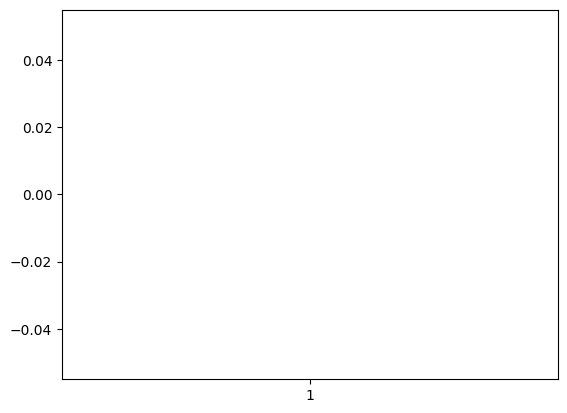

In [27]:
plt.boxplot(gross_earn)
plt.show()

Диаграмма пустая. Это связано с наличием пропущенных значений по признаку.
<br>Попробуйте построить гистограмму с помощью метода hist(), чтобы посмотреть на распределение признака.

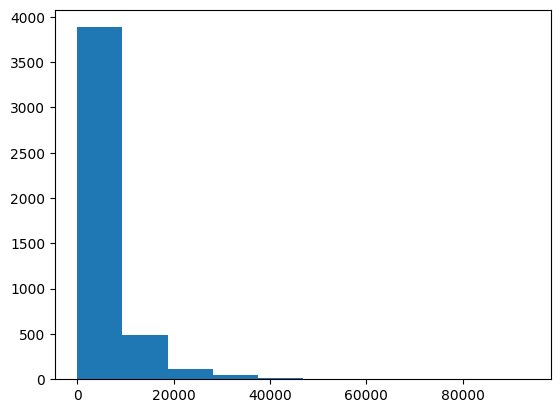

In [28]:
plt.hist(gross_earn)
plt.show()

Гистограмма показывает, на достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничьте графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново постройте "ящик с усами"

In [29]:
gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

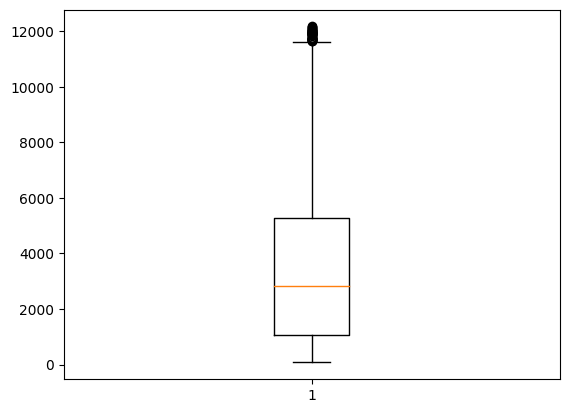

In [30]:
plt.boxplot(gross_earn_2)
plt.show()

Также, заново постройте гистограмму, при этом передав в нее параметр bins=20 для лучшей визуализации

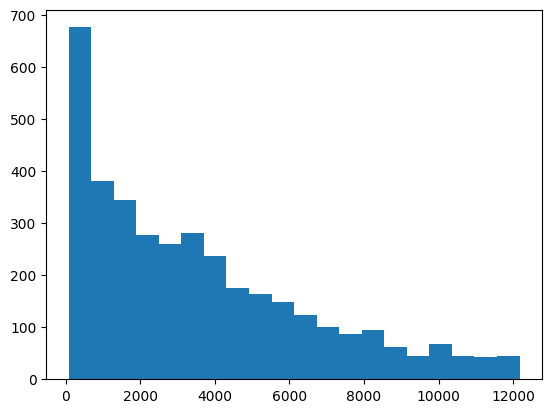

In [97]:
plt.hist(gross_earn_2, bins=20)
plt.show()

**Выводы:**
1.Доход мин = 200 max = 11 500

2.Нулевых значений нет. Предобработка не нужна

3.Средний доход - 4901. Медианный 2823. Видимо много фильмов с очень высоким доходом.

4.10-й процентиль доходов фильмов:  78.0

25-й процентиль доходов фильмов:  698.75

50-й процентиль доходов фильмов:  2823.5

75-й процентиль доходов фильмов:  6266.5

90-й процентиль доходов фильмов:  12177
5. Есть выбросы которые надо исключить.Гистограмма сильно смещена в одну сторону.

Напишите выводы по разделу:
1.   О максимальных и минимальных значениях признака (оцените размах значений).
2.   О нулевых значениях (их наличие, нужна ли предобработка).
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).

### **5.2. runtime_clear*

По аналогии проанализируйте продолжительность фильмов

In [32]:
runtime = dataset['runtime_clear']
max_runtime = runtime.max()
min_runtime = runtime.min()
print("Наибольшее время -", max_runtime, " Наименьшее время -", min_runtime)

Наибольшее время - 366  Наименьшее время - 0


In [33]:
mean_time = runtime.mean()
print('Средняя продолжительность: ', mean_time)

Средняя продолжительность:  109.606


In [34]:
dataset[dataset['runtime_clear']==0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
249,https://m.media-amazon.com/images/S/sash/4Fyxw...,A Moment to Remember,144 min,"Drama, Romance",NaN,8.1,A young couple's enduring love is tested when ...,John H. Lee,"('Jung Woo-sung',), ('Son Ye-jin',), ('Jong-ha...","23,957",NaN,0,NaN
329,https://m.media-amazon.com/images/S/sash/4Fyxw...,My Sassy Girl,137 min,"Comedy, Drama, Romance",NaN,8.0,"A young man sees a drunk, cute woman standing ...",Jae-young Kwak,"('Tae-Hyun Cha',), ('Jun Ji-hyun',), ('In-mun ...","48,123",NaN,0,NaN
338,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Blue Elephant,170 min,"Drama, Horror, Mystery",NaN,8.0,"The story of Dr. Yehia, a psychotherapist at A...",Marwan Hamed,"('Karim Abdel Aziz',), ('Khaled El-Sawi',), ('...","28,525",NaN,0,NaN
485,https://m.media-amazon.com/images/S/sash/4Fyxw...,Knockin' on Heaven's Door,87 min,"Action, Crime, Comedy",NaN,7.9,Two terminally ill patients escape from a hosp...,Thomas Jahn,"('Til Schweiger',), ('Jan Josef Liefers',), ('...","30,499",$0.00M,0,0.0
639,https://m.media-amazon.com/images/S/sash/4Fyxw...,Bringing Up Baby,102 min,Comedy,NaN,7.8,While trying to secure a $1 million donation f...,Howard Hawks,"('Katharine Hepburn',), ('Cary Grant',), ('Cha...","61,412",NaN,0,NaN
710,https://m.media-amazon.com/images/S/sash/4Fyxw...,In July,99 min,"Adventure, Comedy, Romance",NaN,7.7,"A young, insecure teacher embarks on a journey...",Fatih Akin,"('Moritz Bleibtreu',), ('Christiane Paul',), (...","22,064",NaN,0,NaN
965,https://m.media-amazon.com/images/S/sash/4Fyxw...,Red Cliff II,142 min,"Action, Adventure, Drama",NaN,7.5,Second and final part of epic tale about a leg...,John Woo,"('Tony Chiu-Wai Leung',), ('Takeshi Kaneshiro'...","24,294",$0.63M,0,63.0
1249,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hunting Season,140 min,"Crime, Drama, Mystery",NaN,7.4,The lives of three homicide detectives are tur...,Yavuz Turgul,"('Sener Sen',), ('Cem Yilmaz',), ('Çetin Tekin...","34,524",NaN,0,NaN
1287,https://m.media-amazon.com/images/S/sash/4Fyxw...,Yahsi Bati - The Ottoman Cowboys,112 min,"Adventure, Comedy, Fantasy",NaN,7.4,"In 1881, two Ottoman Secret Agents travel to t...",Ömer Faruk Sorak,"('Cem Yilmaz',), ('Ozan Güven',), ('Demet Evga...","35,697",NaN,0,NaN
1353,https://m.media-amazon.com/images/S/sash/4Fyxw...,My Name Is Nobody,116 min,"Comedy, Western",NaN,7.3,"A young, easy-going gunman worships and compet...",Tonino Valerii,"('Terence Hill',), ('Henry Fonda',), ('Jean Ma...","27,093",$0.39M,0,39.0


In [35]:
runtime = dataset[dataset['runtime_clear']!= 0.0]['runtime_clear']

In [36]:
max_runtime = runtime.max()
min_runtime = runtime.min()
print("Наибольшее время -", max_runtime, " Наименьшее время -", min_runtime)

Наибольшее время - 366  Наименьшее время - 45


In [37]:
mean_runtime = runtime.mean()
print('Средняя длительность фильма: ', mean_runtime)

Средняя длительность фильма:  110.26760563380282


In [38]:
median_runtime = runtime.median()
print('Медианная длительность фильма: ', median_runtime)

Медианная длительность фильма:  106.0


In [39]:
percentile_10_runtime = runtime.quantile(0.1)
percentile_25_runtime = runtime.quantile(0.25)
percentile_50_runtime = runtime.quantile(0.50)
percentile_75_runtime = runtime.quantile(0.75)
percentile_90_runtime = runtime.quantile(0.9)

print('10-й процентиль длительности фильмов: ', percentile_10_runtime)
print('25-й процентиль длительности фильмов: ', percentile_25_runtime)
print('50-й процентиль длительности фильмов: ', percentile_50_runtime)
print('75-й процентиль длительности фильмов: ', percentile_75_runtime)
print('90-й процентиль длительности фильмов: ', percentile_90_runtime)

10-й процентиль длительности фильмов:  89.0
25-й процентиль длительности фильмов:  96.0
50-й процентиль длительности фильмов:  106.0
75-й процентиль длительности фильмов:  120.0
90-й процентиль длительности фильмов:  135.0


In [40]:
runtime.describe()

count    4970.000000
mean      110.267606
std        21.441886
min        45.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       366.000000
Name: runtime_clear, dtype: float64

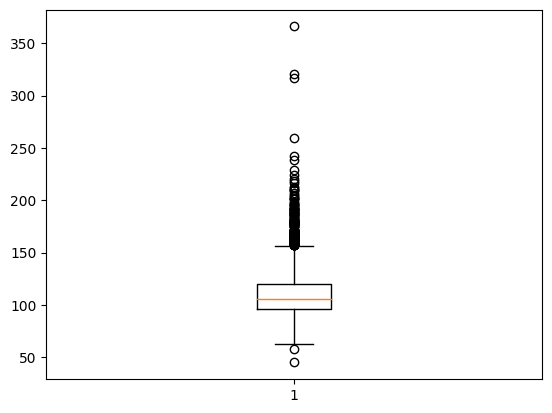

In [41]:
plt.boxplot(runtime)
plt.show()

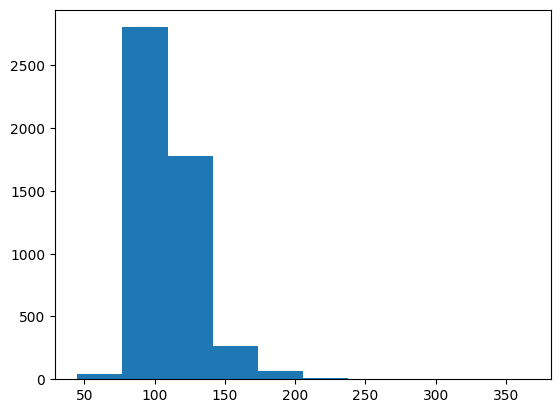

In [42]:
plt.hist(runtime)
plt.show()

In [43]:
runtime_2 = dataset[
    (dataset['runtime_clear']>= percentile_10_runtime)&
    (dataset['runtime_clear']<= percentile_90_runtime)]['runtime_clear']

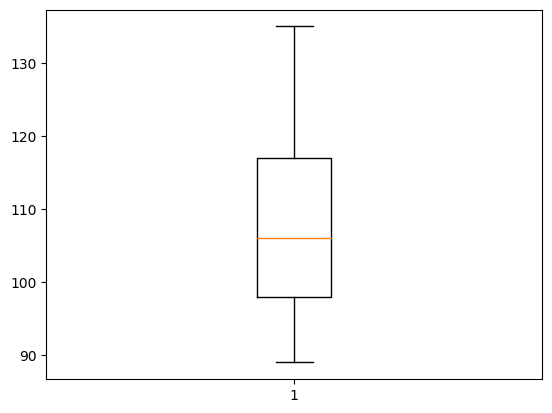

In [44]:
plt.boxplot(runtime_2)
plt.show()

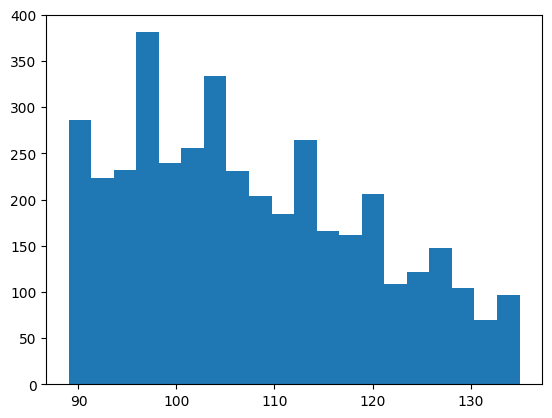

In [45]:
plt.hist(runtime_2, bins=20)
plt.show()

## 6. Неграфический и графический анализ категориальных признаков

Выполните неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Оцените описательные статистики признака с помощью метода describe()

In [46]:
dataset['certificate'].describe()

count     5000
unique      39
top         15
freq      1843
Name: certificate, dtype: object

Изучите уникальные значения признака, получив их с помощью метода unique()

In [47]:
dataset['certificate'].unique()

array(['15', '12A', 'X', 'U', '18', 'PG', '12', 'A', 'AA', 'R', '144 min',
       'Not Rated', 'Rejected', '137 min', '170 min', '87 min', '102 min',
       'UA', '99 min', '142 min', 'PG-13', '140 min', '112 min',
       '116 min', '124 min', '97 min', '100 min', '107 min', '119 min',
       '106 min', '(Banned)', '90 min', '103 min', '104 min', '98 min',
       '93 min', '89 min', '114 min', '70 min'], dtype=object)

Проведите неграфический структурный анализ с помощью метода value_counts()

In [48]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
90 min          3
106 min         2
104 min         2
99 min          2
114 min         2
(Banned)        1
103 min         1
89 min          1
98 min          1
93 min          1
107 min         1
119 min         1
142 min         1
100 min         1
97 min          1
124 min         1
116 min         1
112 min         1
140 min         1
102 min         1
87 min          1
170 min         1
137 min         1
144 min         1
70 min          1
Name: certificate, dtype: int64

Сохраните результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [49]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

In [50]:
certificate_counts

(Banned)        1
89 min          1
98 min          1
93 min          1
107 min         1
119 min         1
142 min         1
100 min         1
103 min         1
97 min          1
116 min         1
112 min         1
140 min         1
102 min         1
87 min          1
170 min         1
137 min         1
124 min         1
144 min         1
70 min          1
99 min          2
104 min         2
106 min         2
114 min         2
90 min          3
Rejected        5
Not Rated       7
PG-13          11
UA             11
R              12
AA             59
X             134
A             186
12            278
U             362
PG            614
18            659
12A           788
15           1843
Name: certificate, dtype: int64

Постройте горизонтальную столбчатую диаграмму с помощью метода barh()

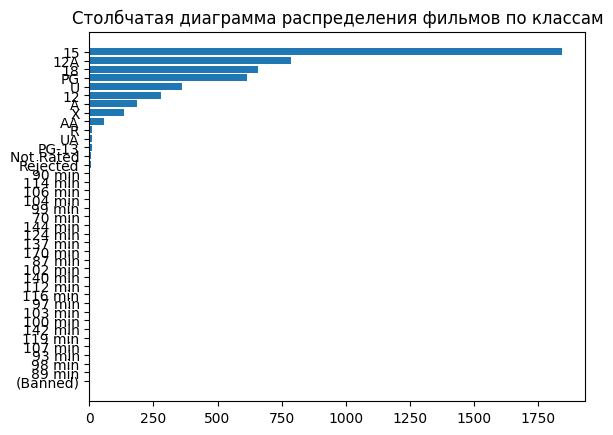

In [51]:

plt.barh(certificate_counts.index, certificate_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.show()

(array([30.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([1.00000e+00, 4.70500e+01, 9.31000e+01, 1.39150e+02, 1.85200e+02,
        2.31250e+02, 2.77300e+02, 3.23350e+02, 3.69400e+02, 4.15450e+02,
        4.61500e+02, 5.07550e+02, 5.53600e+02, 5.99650e+02, 6.45700e+02,
        6.91750e+02, 7.37800e+02, 7.83850e+02, 8.29900e+02, 8.75950e+02,
        9.22000e+02, 9.68050e+02, 1.01410e+03, 1.06015e+03, 1.10620e+03,
        1.15225e+03, 1.19830e+03, 1.24435e+03, 1.29040e+03, 1.33645e+03,
        1.38250e+03, 1.42855e+03, 1.47460e+03, 1.52065e+03, 1.56670e+03,
        1.61275e+03, 1.65880e+03, 1.70485e+03, 1.75090e+03, 1.79695e+03,
        1.84300e+03]),
 <BarContainer object of 40 artists>)

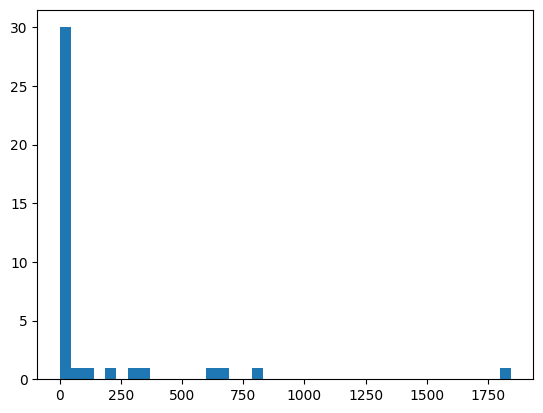

In [52]:
plt.hist(certificate_counts, bins = 40)

Выделите топ-5 классов, по которым больше всего фильмов и сохраните результат в переменную certificate_counts_top_5

In [53]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]
certificate_counts_top_5

15     1843
12A     788
18      659
PG      614
U       362
Name: certificate, dtype: int64

Постройте круговую диаграмму с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

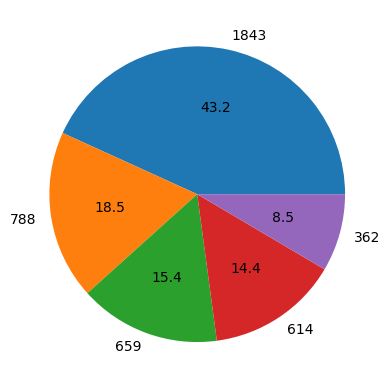

In [54]:
plt.pie(certificate_counts_top_5, labels= certificate_counts_top_5, autopct='%.1f')

plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О количестве уникальных значений признака.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).

### **6.2. rating*

По аналогии проанализируйте рейтинг фильмов

In [55]:
dataset['rating'].describe()

count    5000.000000
mean        6.692300
std         0.973649
min         1.500000
25%         6.100000
50%         6.800000
75%         7.400000
max         9.300000
Name: rating, dtype: float64

In [56]:
dataset['rating'].unique()


array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7,
       6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5, 5.4,
       5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1,
       4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3, 3.1, 3. , 2.9, 2.8, 2.6,
       2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.6, 1.5])

In [57]:
dataset['rating'].value_counts()

6.7    222
6.4    219
6.6    210
7.2    209
7.0    208
      ... 
9.3      1
2.2      1
2.3      1
8.9      1
1.5      1
Name: rating, Length: 74, dtype: int64

In [58]:
rating_counts = dataset['rating'].value_counts().sort_values(ascending=True)

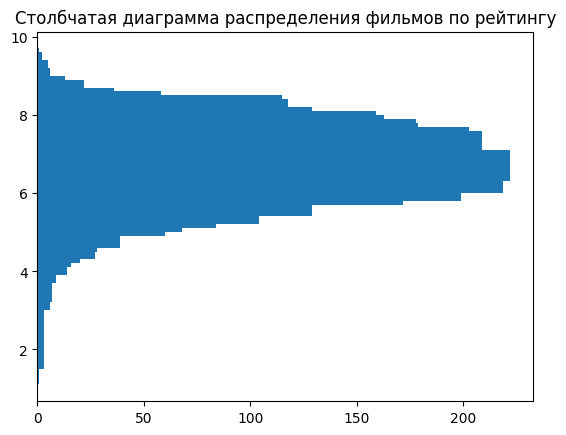

In [59]:
plt.barh(rating_counts.index, rating_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по рейтингу')
plt.show()

In [60]:
rating_counts_top_5 = dataset['rating'].value_counts().iloc[:5]
#rating_counts_top_5 = dataset['rating'].value_counts().round()[:5]
rating_counts_top_5

6.7    222
6.4    219
6.6    210
7.2    209
7.0    208
Name: rating, dtype: int64

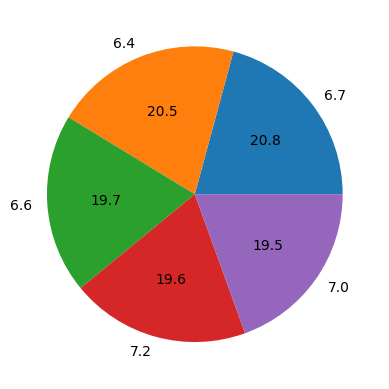

In [61]:
plt.pie(rating_counts_top_5, labels= rating_counts_top_5.index, autopct='%3.1f')

plt.show()

### **6.3. director*

По аналогии проанализируйте кинорежиссеров

---



In [62]:
dataset['director'].describe()

count            5000
unique           1969
top       Woody Allen
freq               38
Name: director, dtype: object

In [63]:
dataset['director'].unique()

array(['Frank Darabont', 'Ertem Egilmez', 'Francis Ford Coppola', ...,
       'Celal Çimen', 'Tom Putnam', 'Harold P. Warren'], dtype=object)

In [64]:
dataset['director'].value_counts()

Woody Allen         38
Clint Eastwood      27
Steven Spielberg    27
Alfred Hitchcock    24
Ridley Scott        21
                    ..
Michael Cuesta       1
Colin Higgins        1
Gérard Pirès         1
Saul Dibb            1
Harold P. Warren     1
Name: director, Length: 1969, dtype: int64

In [65]:
director_counts = dataset['director'].value_counts().sort_values(ascending=True)

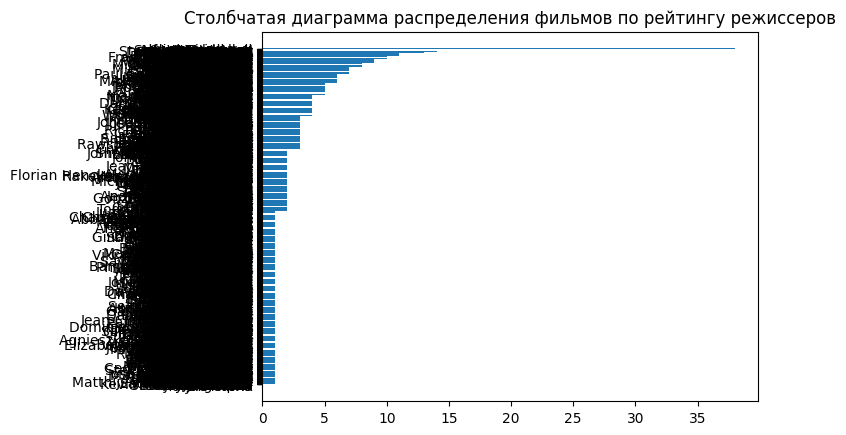

In [66]:
plt.barh(director_counts.index, director_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по рейтингу режиссеров')
plt.show()

In [67]:
director_counts_top_20 = dataset['director'].value_counts().iloc[:5]
director_counts_top_20

Woody Allen         38
Clint Eastwood      27
Steven Spielberg    27
Alfred Hitchcock    24
Ridley Scott        21
Name: director, dtype: int64

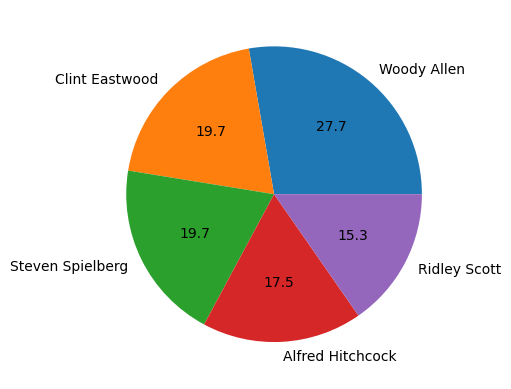

In [68]:
plt.pie(director_counts_top_20, labels=director_counts_top_20.index, autopct='%.1f')
plt.show()

## 7. Анализ взаимосвязи двух количественных признаков

Выполните анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируйте библиотеку seaborn и присвойте ей короткое название sns

In [69]:
import seaborn as sns

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            5000 non-null   object 
 1   title             5000 non-null   object 
 2   certificate       5000 non-null   object 
 3   runtime           5000 non-null   object 
 4   genre             4970 non-null   object 
 5   rating            5000 non-null   float64
 6   about             4986 non-null   object 
 7   director          5000 non-null   object 
 8   stars             5000 non-null   object 
 9   votes             5000 non-null   object 
 10  gross_earn        4585 non-null   object 
 11  runtime_clear     5000 non-null   int64  
 12  gross_earn_clear  4585 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 507.9+ KB


Постройте диаграмму совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

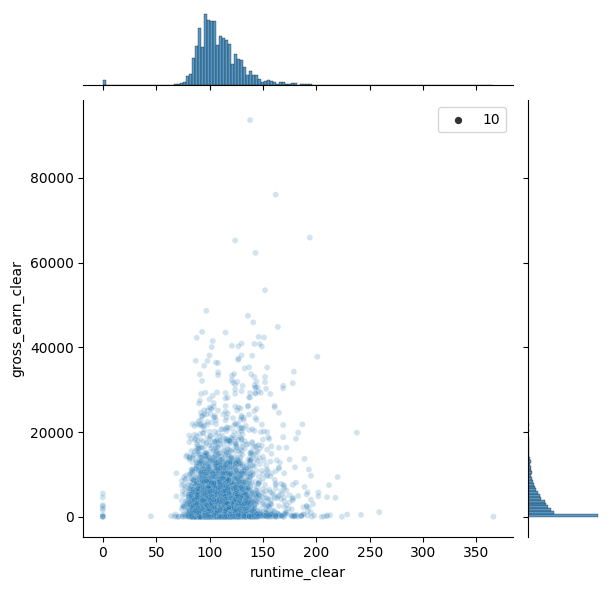

In [71]:
sns.jointplot(data = dataset, x='runtime_clear', y='gross_earn_clear',size=10,alpha=0.2)
plt.show()

Сохраните колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и постройте диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

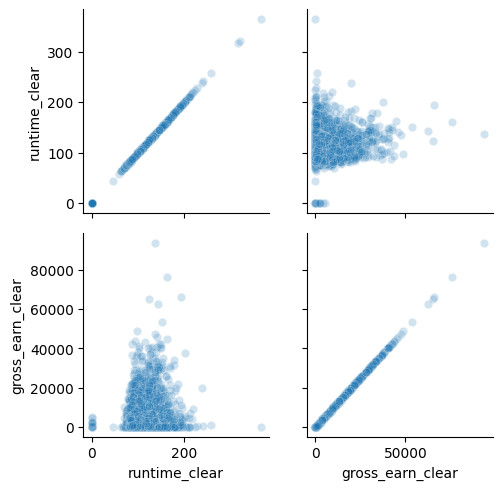

In [72]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.PairGrid(dataset[columns])
g.map(sns.scatterplot,alpha=0.2)

Исключите выбросы, отфильтровав датасет по 99% процентилю. Для этого сохраните копию исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничьте значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [73]:
new_dataset = dataset
for col in columns:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col]<=limiter]

Постройте диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

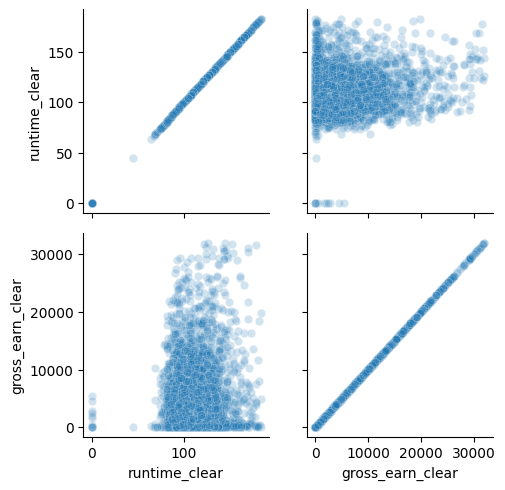

In [74]:
g = sns.PairGrid(new_dataset[columns])
g.map(sns.scatterplot,alpha=0.2)

**Выводы:**
длительность фильма не особо влияет на доход от него.БОльшая часть фильмов приносит доход до 20 000.

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).

## 8. Анализ взаимосвязи двух категориальных признаков

Выполните анализ взаимосвязи двух категориальных признаков
https://www.odin.study/ru/Activity/Info/1221429

### *8.1. director - certificate*

Сохраните уникальные значения признака 'director', определенные с помощью метода unique(), в переменную directors и определите их количество с помощью функции len()

In [75]:
directors = dataset['director'].unique()
len(directors)

1969

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [76]:
dataset['director'].value_counts()

Woody Allen         38
Clint Eastwood      27
Steven Spielberg    27
Alfred Hitchcock    24
Ridley Scott        21
                    ..
Michael Cuesta       1
Colin Higgins        1
Gérard Pirès         1
Saul Dibb            1
Harold P. Warren     1
Name: director, Length: 1969, dtype: int64

Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [77]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

Для корректного визуального представления распределения признака 'certificate' создайте словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраните уникальные значения признака, затем в переменную colors сохраните словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [78]:
labels = dataset['certificate'].unique()
color = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
color

{'15': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '12A': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'X': (1.0, 0.4980392156862745, 0.054901960784313725),
 'U': (1.0, 0.7333333333333333, 0.47058823529411764),
 '18': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'PG': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 '12': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'A': (1.0, 0.596078431372549, 0.5882352941176471),
 'AA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'R': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 '144 min': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Not Rated': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Rejected': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 '137 min': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 '170 min': (0.4980392156862745, 0.4980392156862745, 0

Для каждого кинорежиссера из топ-5 (directors_top_5) постройте круговые диаграммы с помощью метода pie(). Для этого отфильтруйте исходный датасет признаку director и сохраните его в переменную df;
сохраните топ-5 классов фильмов (certificate), определенных с
помощью метода value_counts() и среза, в переменную certificate_counts;

 выведите список уникальных значений топ-5 классов с помощью атрибута index и сохраните его в переменную labels;
 в качестве названия диаграммы передайте кинорежиссера с помощью метода title();

 постройте диаграмму, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'


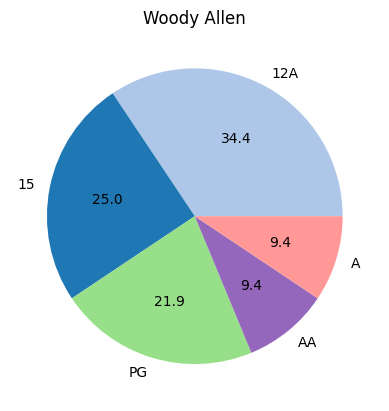

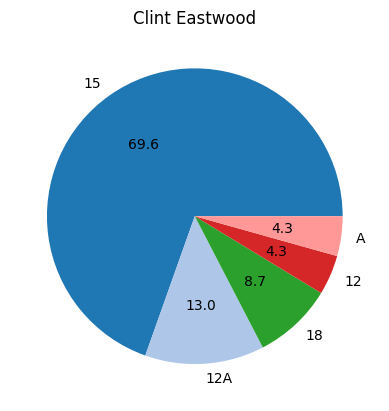

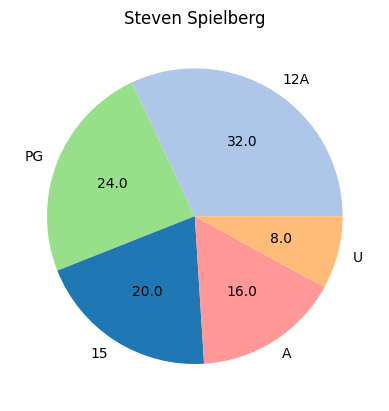

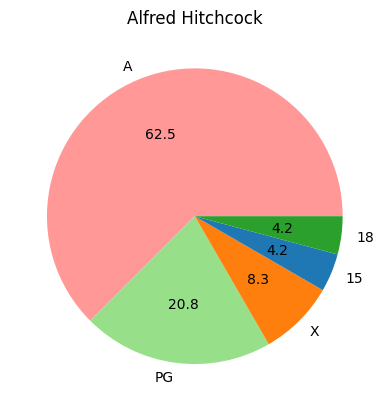

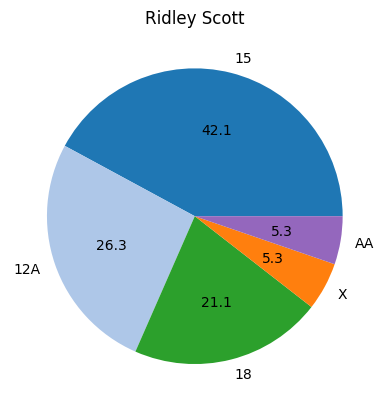

In [79]:
for director in directors_top_5:
  df = dataset[dataset['director']==director]

  certificate_counts = df['certificate'].value_counts()[:5]
  labels = certificate_counts.index
  #print(type(labels))
  #for key in labels:
  #  print(color[key])

  plt.title(director)
  plt.pie(certificate_counts.values, labels=labels, colors = [color[key] for key in labels], autopct='%.1f')

  plt.show()

**Выводы:**
Какой то законмерности по взаимосвязи  признаков не вижу.
У каждого режиссера своя диаграмма, не похожая на другие.
Значит топовые режиссеры  успешно делают фильмы в разных категориях.

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)

### **8.2. director - rating*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и кинорежиссерами

In [80]:
labels_r = dataset['rating'].unique()
print(labels_r)
color_r = dict(zip(labels_r, plt.cm.tab20.colors[:len(labels_r)]))
color_r

[9.3 9.2 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2 8.1 8.  7.9 7.8 7.7 7.6 7.5
 7.4 7.3 7.2 7.1 7.  6.9 6.8 6.7 6.6 6.5 6.4 6.3 6.2 6.1 6.  5.9 5.8 5.7
 5.6 5.5 5.4 5.3 5.2 5.1 5.  4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2 4.1 4.  3.9
 3.8 3.7 3.6 3.5 3.4 3.3 3.1 3.  2.9 2.8 2.6 2.5 2.4 2.3 2.2 2.1 2.  1.9
 1.6 1.5]


{9.3: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 9.2: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 9.0: (1.0, 0.4980392156862745, 0.054901960784313725),
 8.9: (1.0, 0.7333333333333333, 0.47058823529411764),
 8.8: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 8.7: (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 8.6: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 8.5: (1.0, 0.596078431372549, 0.5882352941176471),
 8.4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 8.3: (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 8.2: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 8.1: (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 8.0: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 7.9: (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 7.8: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 7.7: (0.78039215686

Вывод топ 5 рейтингов и одинаковыми цветами у меня не получился.
Бился 4 часа над этой проблемой, так и не понял в чем ошибка.
Оставил вот так.


---

P.S. Вроде получилось. Наверное была путаница с переменными color из вышестоящих ячеек и добавил (sort= False) Не уверен, что правильно сделал.


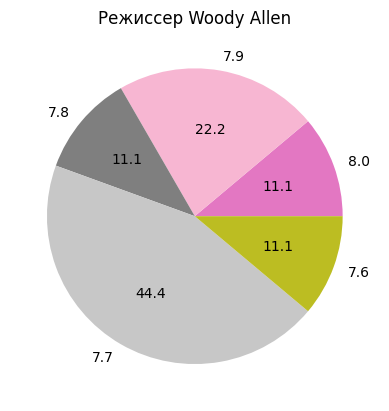

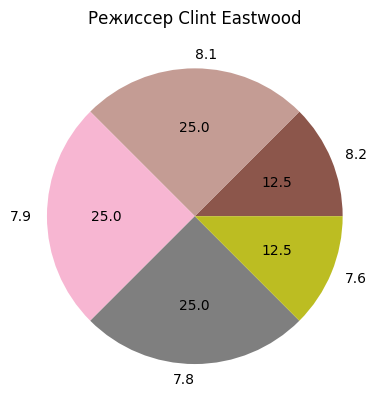

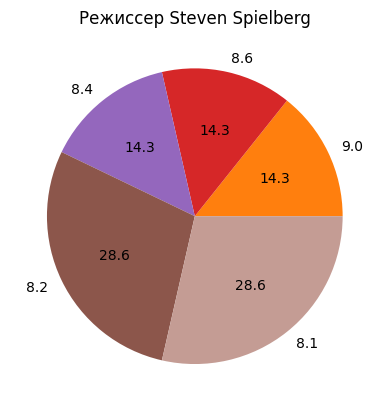

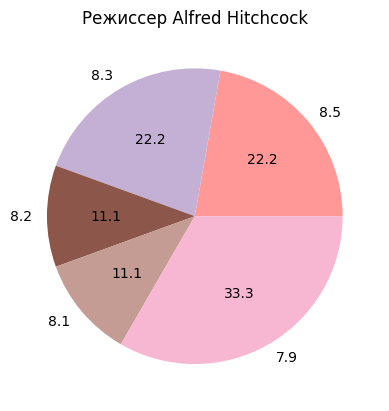

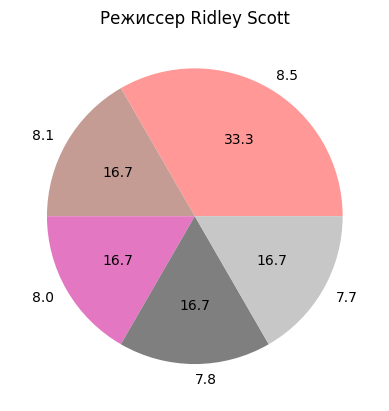

In [81]:
for director in directors_top_5:
  df = dataset[dataset['director']==director]
  #print(director, df['rating'])
  #print("*************************")

  rating_counts = df['rating'].value_counts(sort= False).iloc[:5]
  labels_r = rating_counts.index
  #print(labels_r)
  #for key1 in labels_r:
  #  print(key1)
  #  print(color_r[key1])

  plt.title("Режиссер "+director)
  plt.pie(rating_counts.values, labels=labels_r, colors = [color_r[key1] for key1 in labels_r], autopct='%1.1f')

  plt.show()

Остановился здес ьhttps://www.odin.study/ru/Activity/Info/1221429

### **8.3. certificate - rating*

По аналогии проанализируйте взаимосвязь между классами фильмов и их рейтингом

In [82]:
certificates = dataset['certificate'].unique()
len(certificates)

39

In [83]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
90 min          3
106 min         2
104 min         2
99 min          2
114 min         2
(Banned)        1
103 min         1
89 min          1
98 min          1
93 min          1
107 min         1
119 min         1
142 min         1
100 min         1
97 min          1
124 min         1
116 min         1
112 min         1
140 min         1
102 min         1
87 min          1
170 min         1
137 min         1
144 min         1
70 min          1
Name: certificate, dtype: int64

In [84]:
certificates_top_5 = dataset['certificate'].value_counts()[:5].index
certificate_counts_top_5

15     1843
12A     788
18      659
PG      614
U       362
Name: certificate, dtype: int64

In [85]:
label = dataset['rating'].unique()
color_rat = dict(zip(label, plt.cm.tab20.colors[:len(label)]))
color_rat

{9.3: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 9.2: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 9.0: (1.0, 0.4980392156862745, 0.054901960784313725),
 8.9: (1.0, 0.7333333333333333, 0.47058823529411764),
 8.8: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 8.7: (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 8.6: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 8.5: (1.0, 0.596078431372549, 0.5882352941176471),
 8.4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 8.3: (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 8.2: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 8.1: (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 8.0: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 7.9: (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 7.8: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 7.7: (0.78039215686

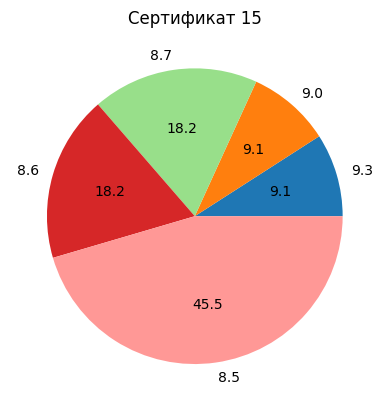

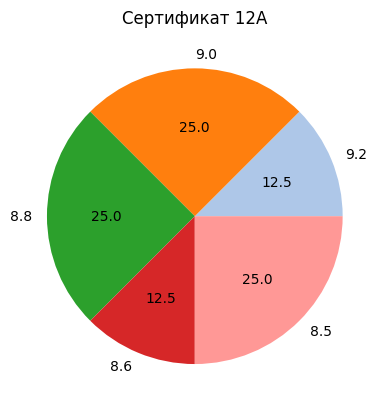

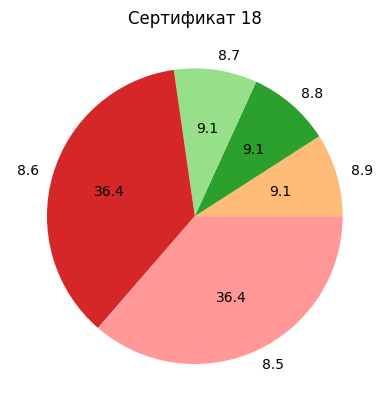

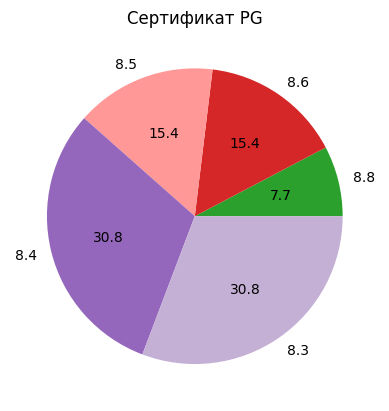

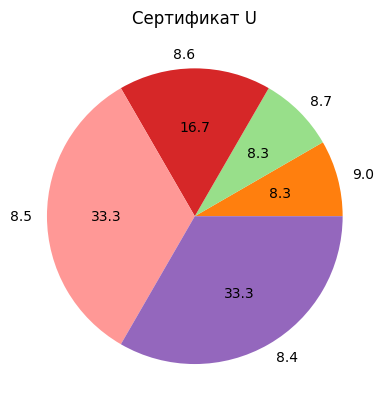

In [86]:
for certi in certificates_top_5:
  df = dataset[dataset['certificate']==certi]
  #df.info()

  rating_counts = df['rating'].value_counts( sort= False).iloc[:5]
  labels = rating_counts.index
  #print(labels)
  #for key in labels:
  #  print(color[key])

  plt.title("Сертификат "+certi)
  plt.pie(rating_counts.values, labels=labels, colors = [color_rat[key] for key in labels], autopct='%.1f')

  plt.show()

## 9. Анализ взаимосвязи количественного и категориального признаков

Выполните анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Оцените медианные значения доходов с фильмов в разрезе классов фильмов. Для этого сгруппируйте датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [87]:
dataset.groupby(['certificate'])['gross_earn_clear'].median()

certificate
(Banned)        NaN
100 min         NaN
102 min         NaN
103 min      1665.0
104 min      5483.0
106 min      4550.0
107 min      2744.0
112 min         NaN
114 min         NaN
116 min        39.0
119 min         NaN
12           4158.0
124 min       456.0
12A          4265.0
137 min         NaN
140 min         NaN
142 min        63.0
144 min         NaN
15           1884.0
170 min         NaN
18           1494.5
70 min          NaN
87 min          0.0
89 min          NaN
90 min       2510.0
93 min          NaN
97 min          NaN
98 min       1960.0
99 min         27.0
A            1614.0
AA           2762.0
Not Rated       6.0
PG           4434.0
PG-13         484.0
R             111.0
Rejected        5.0
U            5670.0
UA           5423.0
X            1475.0
Name: gross_earn_clear, dtype: float64

Оцените описательные статистики доходов с фильмов в разрезе классов фильмов, также сгруппировав таблицу и применив метод describe()

In [88]:
dataset.groupby(['certificate'])['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 min,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102 min,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103 min,1.0,1665.000000,NaN,1665.0,1665.00,1665.0,1665.0,1665.0
104 min,1.0,5483.000000,NaN,5483.0,5483.00,5483.0,5483.0,5483.0
106 min,1.0,4550.000000,NaN,4550.0,4550.00,4550.0,4550.0,4550.0
107 min,1.0,2744.000000,NaN,2744.0,2744.00,2744.0,2744.0,2744.0
112 min,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114 min,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Новый раздел

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов

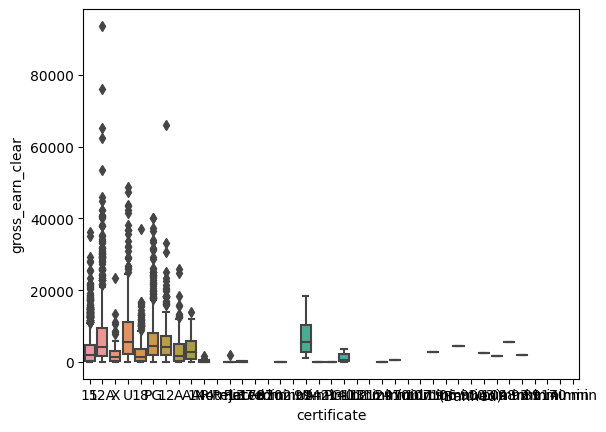

In [89]:
sns.boxplot(data = dataset, x='certificate', y='gross_earn_clear')
plt.show()
#sns.jointplot(data = dataset, x='runtime_clear', y='gross_earn_clear',size=10,alpha=0.2)

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оцените количество значений классов с помощью метода value_counts()

In [90]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
90 min          3
106 min         2
104 min         2
99 min          2
114 min         2
(Banned)        1
103 min         1
89 min          1
98 min          1
93 min          1
107 min         1
119 min         1
142 min         1
100 min         1
97 min          1
124 min         1
116 min         1
112 min         1
140 min         1
102 min         1
87 min          1
170 min         1
137 min         1
144 min         1
70 min          1
Name: certificate, dtype: int64

По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраните список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [91]:
certificate_list = dataset['certificate'].value_counts()[:8].index
certificate_list

Index(['15', '12A', '18', 'PG', 'U', '12', 'A', 'X'], dtype='object')

Отфильтруйте исходный датасет по признаку certificate с помощью метода isin() и сохраните его в переменную dataset_certificate_top_8. Оцените размеры датасета с помощью атрибута shape

In [92]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4864, 13)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 25000 с помощью функции plt.axis() и параметров ymin и ymax

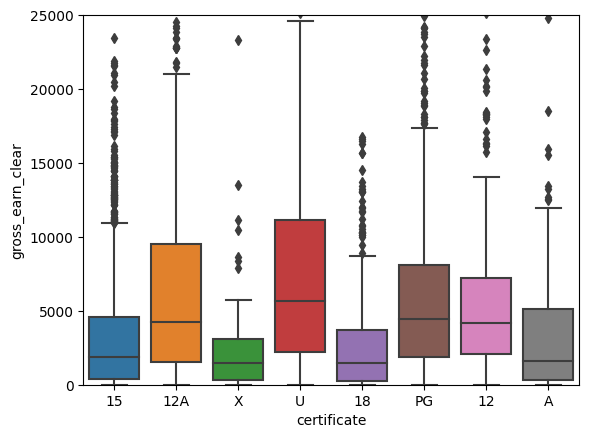

In [99]:
sns.boxplot(data = dataset_certificate_top_8, x='certificate', y='gross_earn_clear')
plt.axis(ymin=0, ymax = 25000)
plt.show()

**Выводы:**




1.Не вижу взаимосвязи признаков.

2.Распредеения признаков отличаются.

3.Медиана распределена похоже у разных категорий.

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
3.   О средних величинах (как распределена медиана).

### **9.2. certificate - runtime_clear*

По аналогии проанализируйте взаимосвязь между классами фильмов и их продолжительностью

### **9.3. director - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и доходами с фильмов

### **9.4. director - runtime_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и продолжительностью фильмов

### **9.5. rating - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и доходами с фильмов

### **9.6. rating - runtime_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и их продолжительностью

## 10. Общий вывод

1.Доход мин = 200 max = 11 500

2.Нулевых значений нет. Предобработка не нужна

3.Средний доход - 4901. Медианный 2823. Видимо много фильмов с очень высоким доходом.

4.10-й процентиль доходов фильмов: 78.0

25-й процентиль доходов фильмов: 698.75

50-й процентиль доходов фильмов: 2823.5

75-й процентиль доходов фильмов: 6266.5

90-й процентиль доходов фильмов: 12177

5.Есть выбросы которые надо исключить.Гистограмма сильно смещена в одну сторону.

**По катенриальным признакам**
Выводы: Какой то законмерности по взаимосвязи признаков не вижу. У каждого режиссера своя диаграмма, не похожая на другие. Значит топовые режиссеры  успешно делают фильмы в разных категориях.

**Анализ количественных и категориальных признаков.**


1.Не вижу взаимосвязи признаков.

2.Распредеения признаков отличаются.

3.Медиана распределена похоже у разных категорий.



Соберите промежуточные выводы в итоговый вывод по разведочному анализу

**Поздравляем! Часть 2 задания по модулю EDA выполнена! Далее Вас ожидают кейсы на фильтрацию, срезы и группировку!**